## Homework #4. Exploratory Data Analysis
#### Author: `Vladyslav Bezborodov`
#### Total time spent on h/w (in minutes): `...`

In [86]:
import pandas as pd

In [87]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [88]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

## Task 2.1
## Messages data analysis

In [89]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,reactions,dialog_id
0,190667,2022-01-03 10:57:14+00:00,PeerUser(user_id=535972821),1016910980,NaN,Ти права,text,NaN,{},1016910980
1,190665,2022-01-03 10:55:56+00:00,NaN,535972821,NaN,"Бачиш, однокласники про тебе не забувають.)",text,NaN,{},1016910980
2,190664,2022-01-03 10:55:15+00:00,PeerUser(user_id=535972821),1016910980,NaN,"Привіііт, дякую!!!)",text,NaN,{},1016910980
3,190663,2022-01-03 10:53:34+00:00,NaN,535972821,NaN,Привіт. Вітаю з Днем народження. 🎉🎉🎉\nБажаю ща...,text,NaN,{},1016910980
4,124727,2021-04-18 15:07:35+00:00,PeerUser(user_id=535972821),1016910980,NaN,Ахах,text,NaN,{},1016910980
5,124726,2021-04-18 15:07:07+00:00,NaN,535972821,NaN,"Просто я крім себе, ще Ані роботу виконувала, ...",text,NaN,{},1016910980
6,124725,2021-04-18 15:05:38+00:00,NaN,535972821,NaN,Ясно. Дякую.,text,NaN,{},1016910980
7,124724,2021-04-18 15:04:51+00:00,PeerUser(user_id=535972821),1016910980,NaN,Своим именем и датой,text,NaN,{},1016910980
8,124723,2021-04-18 15:04:05+00:00,NaN,535972821,NaN,А як ти файл назвав?,text,NaN,{},1016910980
9,124722,2021-04-18 15:03:47+00:00,NaN,535972821,NaN,Жаль.,text,NaN,{},1016910980


In [90]:
df.shape

(258583, 10)

In [91]:
min(df["date"]),max(df["date"])

('2017-12-29 21:39:13+00:00', '2023-10-26 11:49:05+00:00')

In [92]:
df.groupby(["type"])["type"].count()

type
photo       22726
sticker      2695
text       219573
video        5675
voice        7914
Name: type, dtype: int64

In [93]:
df.groupby(["type"])["duration"].sum()

type
photo           0.0
sticker         0.0
text            0.0
video      283530.0
voice      221320.0
Name: duration, dtype: float64

## Tasks to do:

1. Define your telegram ID (https://www.alphr.com/telegram-find-user-id/).

In [94]:
# ID : 535972821

2. Check on examples that the data you downloaded reflects your telegram messages. Make screenshots (insert your screenshots in this notebook) of 3 different messages in TG and related rows in your dataset here.

In [120]:
#rows we gonna take such rows: 258491 ; 791 ; 821

In [121]:
print(df.loc[258491])

id                                                      326541
date                                 2023-05-19 13:28:57+00:00
from_id                            PeerUser(user_id=535972821)
to_id                                                989079793
fwd_from                                                   NaN
message      доообре, я тоді б на вихідних здзвонився, могл...
type                                                      text
duration                                                   NaN
reactions                                     {535972821: '👍'}
dialog_id                                            989079793
Name: 258491, dtype: object


![Alt text](Screenshot_1.png)

In [123]:
print(df.loc[791])

id                                323898
date           2023-05-01 11:22:39+00:00
from_id      PeerUser(user_id=535972821)
to_id                         1083607046
fwd_from                             NaN
message              дякую, що попередив
type                                text
duration                             NaN
reactions                             {}
dialog_id                     1083607046
Name: 791, dtype: object


![Alt text](Screenshot_2.png)

In [124]:
print(df.loc[821])

id                                350303
date           2023-10-22 13:30:04+00:00
from_id      PeerUser(user_id=535972821)
to_id                          109624025
fwd_from                             NaN
message                     добрий день!
type                                text
duration                             NaN
reactions                             {}
dialog_id                      109624025
Name: 821, dtype: object


![img](Screenshot_3.png)

3. Find the longest audio message you've ever sent; what's its duration? Make its screenshot (insert your screenshots in this notebook).

In [96]:
mask = (df["type"] == "voice") & (df["from_id"] == "PeerUser(user_id=535972821)")
voiceMsgFromMe_df = df[mask]

print(max(list(voiceMsgFromMe_df["duration"]))) # answer -> 1296.0 
df[df["duration"]==1296]

1296.0


,id,date,from_id,to_id,fwd_from,message,type,duration,reactions,dialog_id
229232,332814,2023-07-19 08:40:11+00:00,PeerUser(user_id=535972821),556744266,NaN,NaN,voice,1296.0,{},556744266


4. Calculate numbers of send and received(s&r) messages.

In [97]:
mask1 = df["from_id"] == "PeerUser(user_id=535972821)"
mask2 = df["to_id"] == 535972821
sendByMe_df = df[mask1]
sendToMe_df = df[mask2]

print("Message quantity send by me is : {} \nMessage quantity send to me is : {} \nOverall : {}".format(sendByMe_df.shape[0],sendToMe_df.shape[0], (sendByMe_df.shape[0]+sendToMe_df.shape[0]) ))

Message quantity send by me is : 121644 
Message quantity send to me is : 136939 
Overall : 258583


5. Draw number of send and received(s&r) messages per day (x-axis - is date(from min(date) till max(date)), y-axis number of messages). There should be two lines: blue for received red for send.

C:\Users\Cyberpower\AppData\Local\Temp\ipykernel_12016\3795427058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sendByMe_df["date"] = pd.to_datetime(sendByMe_df['date'])
C:\Users\Cyberpower\AppData\Local\Temp\ipykernel_12016\3795427058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sendToMe_df["date"] = pd.to_datetime(sendToMe_df['date'])


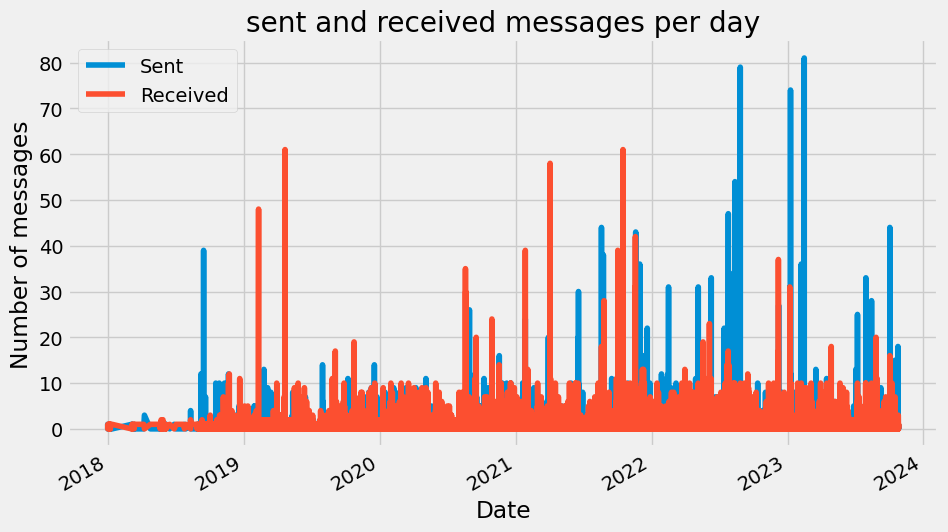

In [171]:
%matplotlib inline

import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df['date'])
sendByMe_df["date"] = pd.to_datetime(sendByMe_df['date'])
sendToMe_df["date"] = pd.to_datetime(sendToMe_df['date'])

sendByMe_count = sendByMe_df.groupby(sendByMe_df["date"]).size()
sendToMe_count = sendToMe_df.groupby(sendToMe_df["date"]).size()

message_counts = pd.DataFrame({'Sent': sendByMe_count, 'Received': sendToMe_count}).fillna(0)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))

message_counts.plot(kind='line', ax=plt.gca())

plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.title('sent and received messages per day')
plt.show()

6. Draw a few diagrams to show distributions between post types in the time, a diagram showing the total amount of messages of each type.

<Axes: ylabel='count'>

<Figure size 1000x600 with 0 Axes>

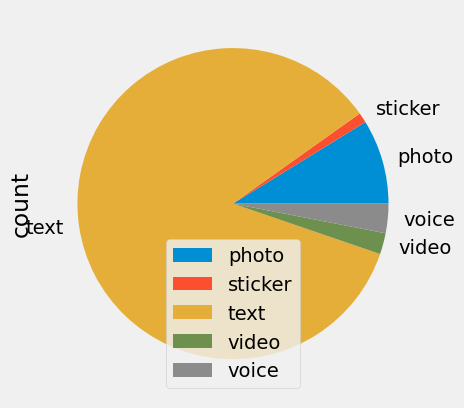

In [174]:
# import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))

var_cross_tab = pd.crosstab(index=df.loc[:, 'type'], columns='count')
var_cross_tab.plot(kind='pie', y='count')

<Axes: xlabel='date'>

<Figure size 1700x600 with 0 Axes>

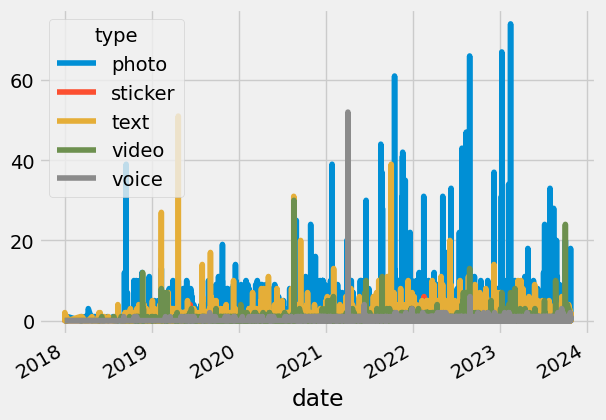

In [181]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17, 6))

var_cross_tab = pd.crosstab(index=df['date'], columns=df['type'])

var_cross_tab.plot(kind='line')

7. Calculate top-10 people to whom you wrote the biggest amount of messages (name, amount of messages).

In [105]:
top10to_df = pd.crosstab(index = sendByMe_df["to_id"], columns = 'count')
top10to_df = top10to_df.sort_values(by='count', ascending= False)
top10to_df = top10to_df.reset_index()

top10to_df.head(10)

col_0,to_id,count
0,530031892,41255
1,457411898,28706
2,556744266,6799
3,485284414,5754
4,391796497,5642
5,451683665,5529
6,381081723,3587
7,424360090,2758
8,575745051,1471
9,490066330,1324


8. Calculate top-10 people who wrote the biggest amount of messages to you (name, amount of messages).

In [106]:
top10from_df = pd.crosstab(index = sendToMe_df["dialog_id"], columns = 'count')
top10from_df = top10from_df.sort_values(by='count', ascending= False)
top10from_df = top10from_df.reset_index()

top10from_df.head(10)

col_0,dialog_id,count
0,530031892,42857
1,457411898,29122
2,485284414,8782
3,451683665,7834
4,556744266,6934
5,391796497,6427
6,381081723,3640
7,424360090,3299
8,575745051,1865
9,498249299,1780


## Task 2.2
## Dialogs data analysis

In [187]:
df_meta.shape

(8132, 5)

In [126]:
df_meta.head(10)
# df_meta.columns

,dialog_id,name,type,users
0,-1001124109395,Філіал КМЦ,Group,"{'user_id': 346039675, 'first_name': 'Sofia', ..."
1,-1001124109395,Філіал КМЦ,Group,"{'user_id': 498249299, 'first_name': 'Ро', 'la..."
2,-1001124109395,Філіал КМЦ,Group,"{'user_id': 691654799, 'first_name': 'Kmet', '..."
3,-1001124109395,Філіал КМЦ,Group,"{'user_id': 468240548, 'first_name': 'Бадди', ..."
4,-1001124109395,Філіал КМЦ,Group,"{'user_id': 541388599, 'first_name': 'G', 'las..."
5,-1001124109395,Філіал КМЦ,Group,"{'user_id': 257382115, 'first_name': 'Yuliia',..."
6,-1001124109395,Філіал КМЦ,Group,"{'user_id': 530031892, 'first_name': 'anastasi..."
7,-1001124109395,Філіал КМЦ,Group,"{'user_id': 578518875, 'first_name': 'dim_1_4i..."
8,-1001124109395,Філіал КМЦ,Group,"{'user_id': 785906745, 'first_name': 'Артём', ..."
9,-1001124109395,Філіал КМЦ,Group,"{'user_id': 711288179, 'first_name': 'CSIBTN',..."


In [101]:
df_meta.groupby(["type"])["type"].count()

type
Channel             55
Group             7890
Private dialog     187
Name: type, dtype: int64

## Tasks to do:

1. Find our TG group. Print its id and list of participants.

In [130]:
mask = df_meta["name"] == "CSS"
df_meta[mask]["users"]

6825    {'user_id': 729318464, 'first_name': 'Ilya', '...
6826    {'user_id': 682010001, 'first_name': 'Dania', ...
6827    {'user_id': 477350397, 'first_name': 'Dmytro',...
6828    {'user_id': 497535105, 'first_name': 'oi liza-...
6829    {'user_id': 463933526, 'first_name': 'Misha', ...
6830    {'user_id': 770605699, 'first_name': 'Yuliia',...
6831    {'user_id': 535972821, 'first_name': 'Vladysla...
6832    {'user_id': 398250376, 'first_name': 'Sofiia',...
6833    {'user_id': 201415286, 'first_name': 'Stas', '...
6834    {'user_id': 406896588, 'first_name': 'Dmytro',...
6835    {'user_id': 345300152, 'first_name': 'Olexandr...
6836    {'user_id': 351002004, 'first_name': 'Elena', ...
6837    {'user_id': 488585214, 'first_name': 'Uliana',...
6838    {'user_id': 296315254, 'first_name': 'Деодат',...
6839    {'user_id': 278043516, 'first_name': 'Anastasi...
6840    {'user_id': 517713844, 'first_name': 'Kate', '...
Name: users, dtype: object

2. Draw distribution of group sizes.

In [188]:
df_meta['usersToDict'] = df_meta['users'].apply(lambda x:eval(x))
df_meta["usersToDict"].loc[0]

{'user_id': 346039675,
 'first_name': 'Sofia',
 'last_name': None,
 'username': 'Sofiiish',
 'phone': '380937408778'}

c:\users\cyberpower\python_course\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\cyberpower\python_course\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\cyberpower\python_course\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


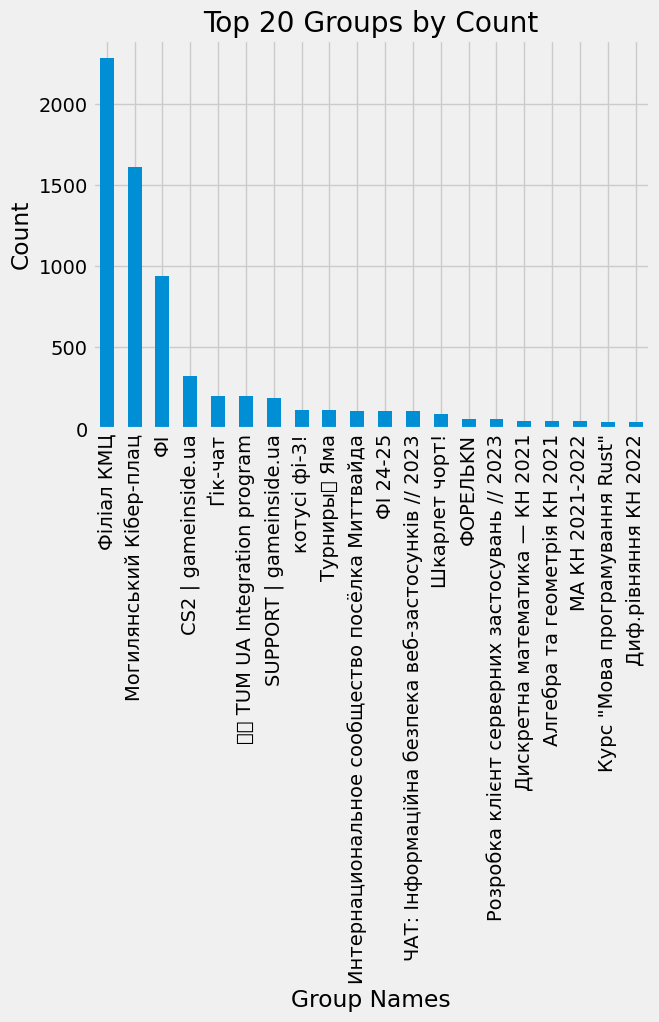

In [214]:
# df_meta.groupby('type')['name'].size()
df_temp = df_meta[df_meta['type'] == 'Group'] 
var_cross_tab = pd.crosstab(index = df_temp['name'], columns = 'count')


top_groups = var_cross_tab['count'].nlargest(20)
top_groups.plot(kind='bar', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Group Names')
plt.ylabel('Count')
plt.title('Top 20 Groups by Count')
plt.show()






3. Calculate top-10 the biggest groups/channels.

In [209]:
mask = (df_meta['type'] == 'Group') | (df_meta['type'] == 'Channel')
df_temp = df_meta[mask]
var_cross_tab = pd.crosstab(index = df_temp['name'], columns = 'count')
var_cross_tab = var_cross_tab.sort_values(by='count', ascending=False)

In [211]:
var_cross_tab.head(10)

col_0,count
name,
Філіал КМЦ,2279
Могилянський Кібер-плац,1613
ФІ,938
CS2 | gameinside.ua,323
🇺🇦 TUM UA Integration program,202
Ґік-чат,202
SUPPORT | gameinside.ua,190
котусі фі-3!,115
Турниры🏆 Яма,113


4. Calculate the number of distinct user names you are connected to through any type of dialogue.

In [228]:
# for i in df_meta["usersToDict"]:
#     print(i['user_id'])
list_of_names = [i['user_id'] for i in df_meta['usersToDict']]
list_of_names = list(set(list_of_names))
print("The amount of distinct users I am connected to is : {}".format(len(list_of_names)))

The amount of distinct users I am connected to is : 4663
